In [42]:
#run pip install yfinance if not installed

import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [43]:
sp500=yf.Ticker('^GSPC')

In [44]:
#non trading days are not included in this data

sp500=sp500.history(period="max")
print(sp500)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1950-01-03    16.660000    16.660000    16.660000    16.660000     1260000   
1950-01-04    16.850000    16.850000    16.850000    16.850000     1890000   
1950-01-05    16.930000    16.930000    16.930000    16.930000     2550000   
1950-01-06    16.980000    16.980000    16.980000    16.980000     2010000   
1950-01-09    17.080000    17.080000    17.080000    17.080000     2520000   
...                 ...          ...          ...          ...         ...   
2022-07-11  3880.939941  3880.939941  3847.219971  3854.429932  3023830000   
2022-07-12  3851.949951  3873.409912  3802.360107  3818.800049           0   
2022-07-13  3779.669922  3829.439941  3759.070068  3801.780029  3166580000   
2022-07-14  3763.989990  3796.409912  3721.560059  3790.379883  3447500000   
2022-07-15  3818.000000  3863.620117  3817.179932  3863.159912  

<AxesSubplot:xlabel='Date'>

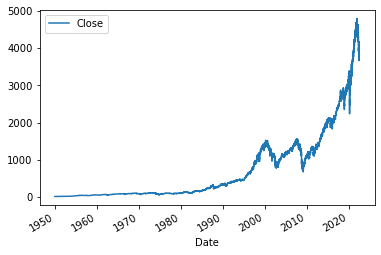

In [45]:
#Data viz
sp500.plot.line(y="Close", use_index=True)

In [46]:
#Data Cleansing
del sp500["Dividends"]
del sp500["Stock Splits"]

In [47]:
print(sp500)

                   Open         High          Low        Close      Volume
Date                                                                      
1950-01-03    16.660000    16.660000    16.660000    16.660000     1260000
1950-01-04    16.850000    16.850000    16.850000    16.850000     1890000
1950-01-05    16.930000    16.930000    16.930000    16.930000     2550000
1950-01-06    16.980000    16.980000    16.980000    16.980000     2010000
1950-01-09    17.080000    17.080000    17.080000    17.080000     2520000
...                 ...          ...          ...          ...         ...
2022-07-11  3880.939941  3880.939941  3847.219971  3854.429932  3023830000
2022-07-12  3851.949951  3873.409912  3802.360107  3818.800049           0
2022-07-13  3779.669922  3829.439941  3759.070068  3801.780029  3166580000
2022-07-14  3763.989990  3796.409912  3721.560059  3790.379883  3447500000
2022-07-15  3818.000000  3863.620117  3817.179932  3863.159912  3537130000

[18252 rows x 5 columns]

In [48]:
#In this project, directionality of Stock Price matters more than the exact price of the stock, we aim to predict if the price keeps on going up and if investing is worth it or not.

In [49]:
sp500["Tomorrow"]=sp500["Close"].shift(-1)
print(sp500)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1950-01-03    16.660000    16.660000    16.660000    16.660000     1260000   
1950-01-04    16.850000    16.850000    16.850000    16.850000     1890000   
1950-01-05    16.930000    16.930000    16.930000    16.930000     2550000   
1950-01-06    16.980000    16.980000    16.980000    16.980000     2010000   
1950-01-09    17.080000    17.080000    17.080000    17.080000     2520000   
...                 ...          ...          ...          ...         ...   
2022-07-11  3880.939941  3880.939941  3847.219971  3854.429932  3023830000   
2022-07-12  3851.949951  3873.409912  3802.360107  3818.800049           0   
2022-07-13  3779.669922  3829.439941  3759.070068  3801.780029  3166580000   
2022-07-14  3763.989990  3796.409912  3721.560059  3790.379883  3447500000   
2022-07-15  3818.000000  3863.620117  3817.179932  3863.159912  

In [50]:
sp500["Target"]=(sp500["Tomorrow"]>sp500["Close"]).astype(int)
print(sp500)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1950-01-03    16.660000    16.660000    16.660000    16.660000     1260000   
1950-01-04    16.850000    16.850000    16.850000    16.850000     1890000   
1950-01-05    16.930000    16.930000    16.930000    16.930000     2550000   
1950-01-06    16.980000    16.980000    16.980000    16.980000     2010000   
1950-01-09    17.080000    17.080000    17.080000    17.080000     2520000   
...                 ...          ...          ...          ...         ...   
2022-07-11  3880.939941  3880.939941  3847.219971  3854.429932  3023830000   
2022-07-12  3851.949951  3873.409912  3802.360107  3818.800049           0   
2022-07-13  3779.669922  3829.439941  3759.070068  3801.780029  3166580000   
2022-07-14  3763.989990  3796.409912  3721.560059  3790.379883  3447500000   
2022-07-15  3818.000000  3863.620117  3817.179932  3863.159912  

In [51]:
sp500=sp500.loc["2000-01-01":].copy()

In [52]:
print(sp500)

                   Open         High          Low        Close      Volume  \
Date                                                                         
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971   931800000   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1009000000   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1085500000   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1092300000   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1225200000   
...                 ...          ...          ...          ...         ...   
2022-07-11  3880.939941  3880.939941  3847.219971  3854.429932  3023830000   
2022-07-12  3851.949951  3873.409912  3802.360107  3818.800049           0   
2022-07-13  3779.669922  3829.439941  3759.070068  3801.780029  3166580000   
2022-07-14  3763.989990  3796.409912  3721.560059  3790.379883  3447500000   
2022-07-15  3818.000000  3863.620117  3817.179932  3863.159912  

In [53]:
model=RandomForestClassifier(n_estimators=1000, min_samples_split=100, random_state=1)

In [58]:
train=sp500.iloc[:-2000]
test=sp500.iloc[-2000:]
predictor_columns=["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictor_columns], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [59]:
preds=model.predict(test[predictor_columns])

In [60]:
preds=pd.Series(preds, index=test.index)

In [61]:
precision_score(test["Target"], preds)

0.521505376344086